In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
import os
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


In [3]:
df=pd.read_csv(r"C:\Users\rajes\OneDrive\Desktop\auto insurence fraud detection\data\insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.isna().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted           True
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [5]:
IQR=[]
IQR.append(df['age'].quantile(0.75)-df['age'].quantile(0.25))
IQR.append(df['policy_annual_premium'].quantile(0.75)-df['policy_annual_premium'].quantile(0.25))
IQR.append(df['umbrella_limit'].quantile(0.75)-df['umbrella_limit'].quantile(0.25))
IQR.append(df['total_claim_amount'].quantile(0.75)-df['total_claim_amount'].quantile(0.25))
IQR.append(df['property_claim'].quantile(0.75)-df['property_claim'].quantile(0.25))
IQR

[12.0, 326.0875000000001, 0.0, 28780.0, 6440.0]

In [6]:
upper = []
upper.append(df['age'].quantile(0.75) + 1.5 * IQR[0])
upper.append(df['policy_annual_premium'].quantile(0.75) + 1.5 * IQR[1])
upper.append(df['umbrella_limit'].quantile(0.75) + 1.5 * IQR[2])
upper.append(df['total_claim_amount'].quantile(0.75) + 1.5 * IQR[3])
upper.append(df['property_claim'].quantile(0.75) + 1.5 * IQR[4])

lower = []
lower.append(df['age'].quantile(0.25) - 1.5 * IQR[0])
lower.append(df['policy_annual_premium'].quantile(0.25) - 1.5 * IQR[1])
lower.append(df['umbrella_limit'].quantile(0.25) - 1.5 * IQR[2])
lower.append(df['total_claim_amount'].quantile(0.25) - 1.5 * IQR[3])
lower.append(df['property_claim'].quantile(0.25) - 1.5 * IQR[4])

IQR, upper, lower


([12.0, 326.0875000000001, 0.0, 28780.0, 6440.0],
 [62.0, 1904.8262500000003, 0.0, 113762.5, 20545.0],
 [14.0, 600.4762499999999, 0.0, -1357.5, -5215.0])

In [7]:
df['age']=np.where(df['age']>62,62, np.where(df['age'] <14, 14, df['age']))
df['policy_annual_premium']=np.where(df['policy_annual_premium']>upper[1], upper[1], np.where(df['policy_annual_premium']<lower [1], lower[1], df['policy_annual_premium']))
df['umbrella_limit']=np.where(df['umbrella_limit']>upper[2], upper[2], np.where(df['umbrella_limit']<lower[2], lower[2], df['umbrella_limit']))
df['total_claim_amount']=np.where(df['total_claim_amount']>upper[3], upper[3], np.where(df['total_claim_amount']<lower[3], lower[3], df['total_claim_amount']))
df['property_claim']=np.where(df['property_claim']>upper[4 ], upper[4], np.where(df['property_claim']<lower[4], lower [4], df['property_claim']))


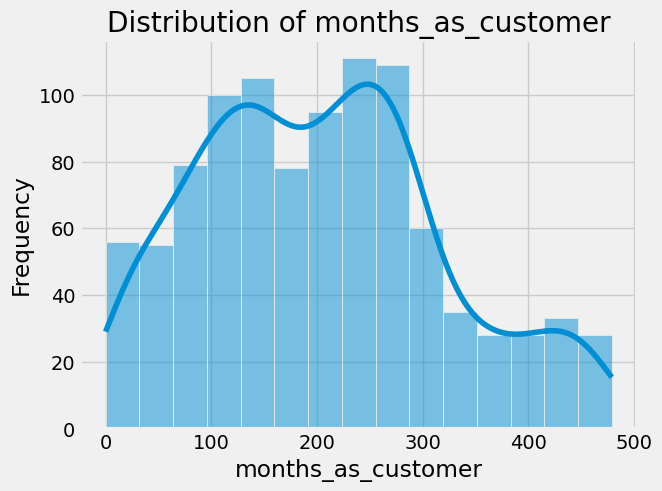

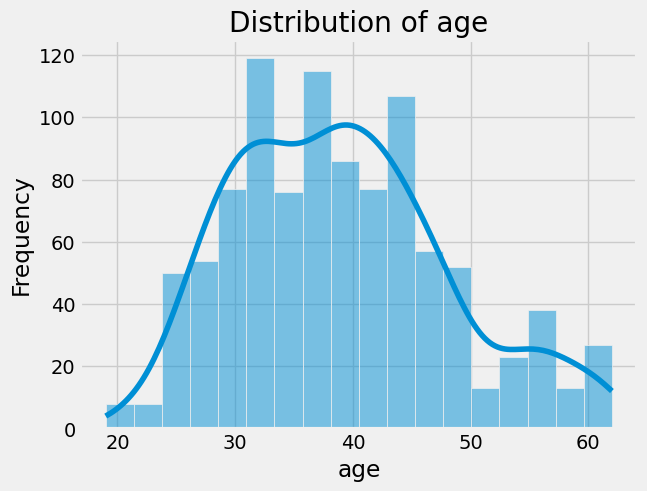

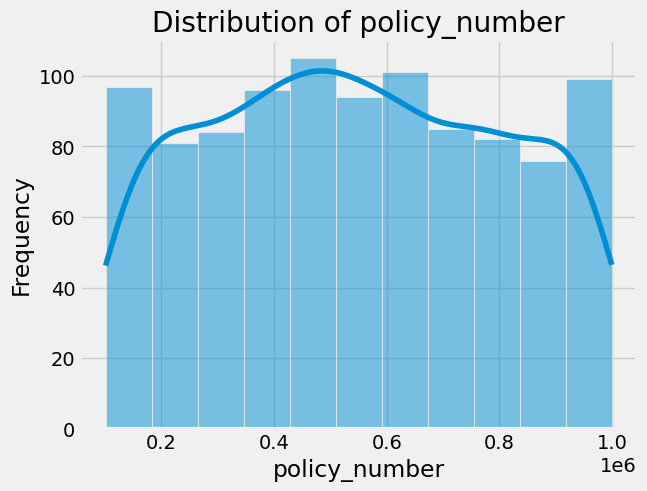

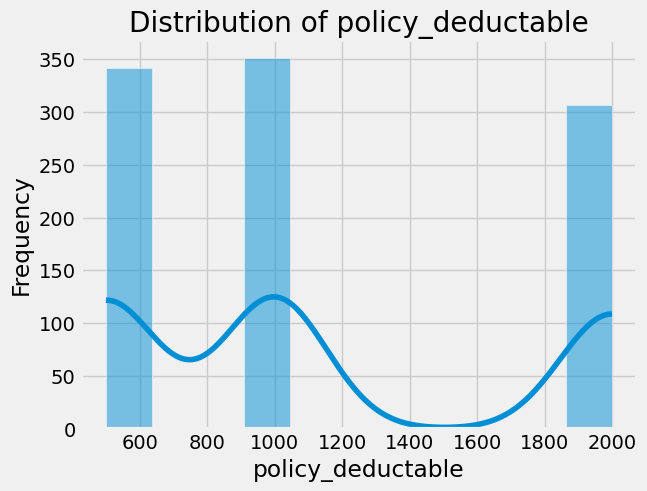

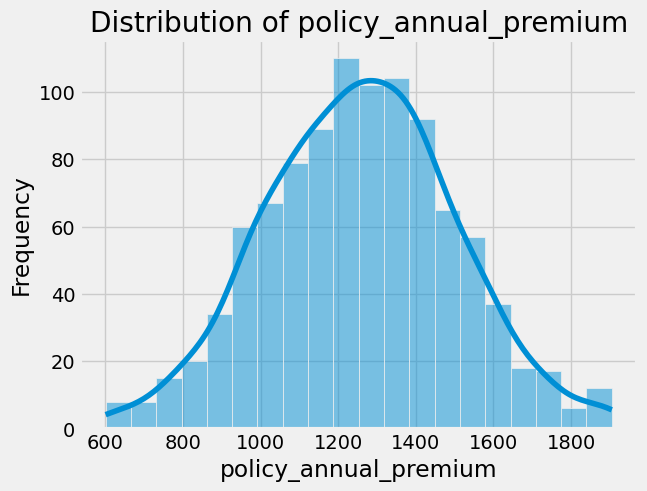

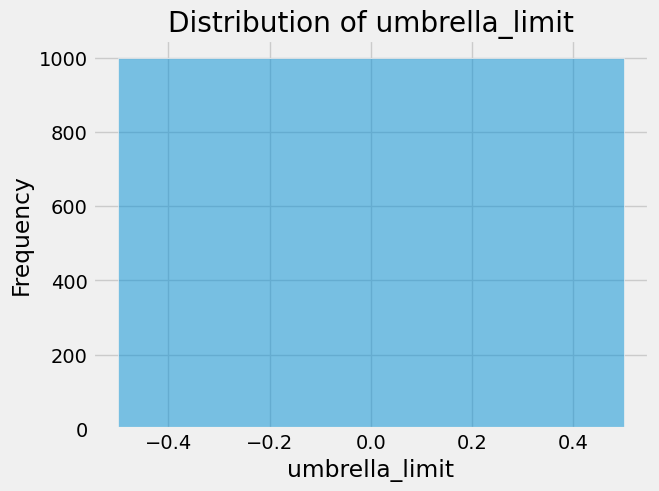

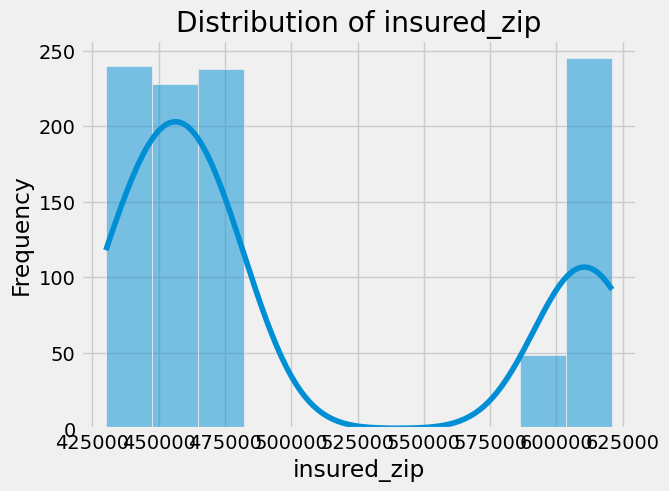

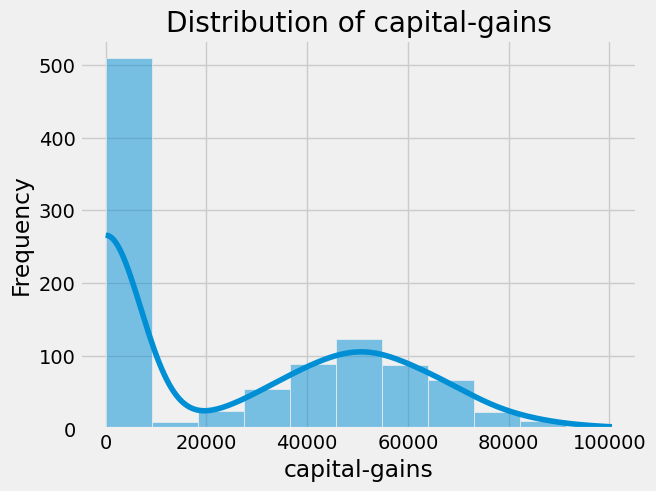

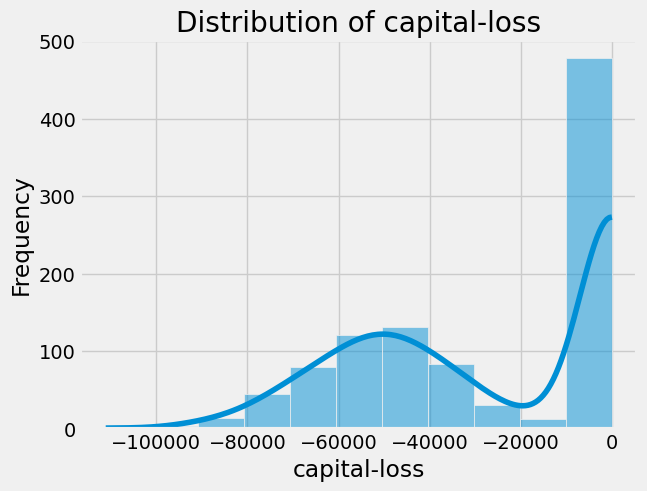

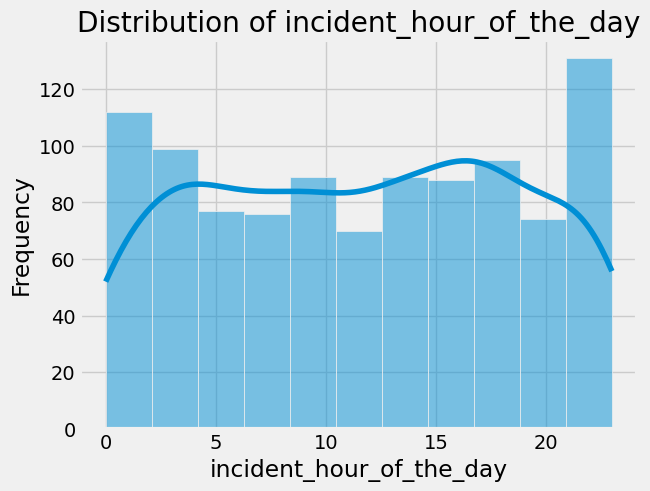

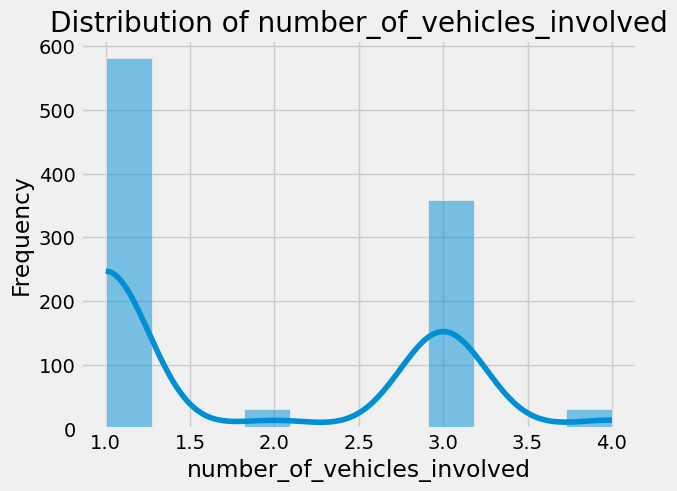

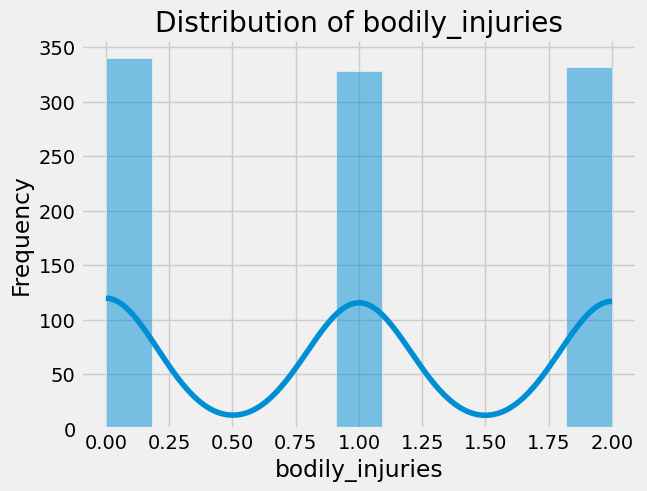

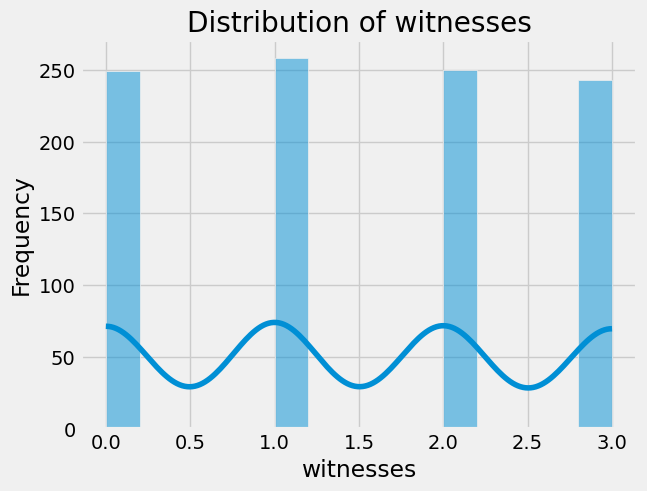

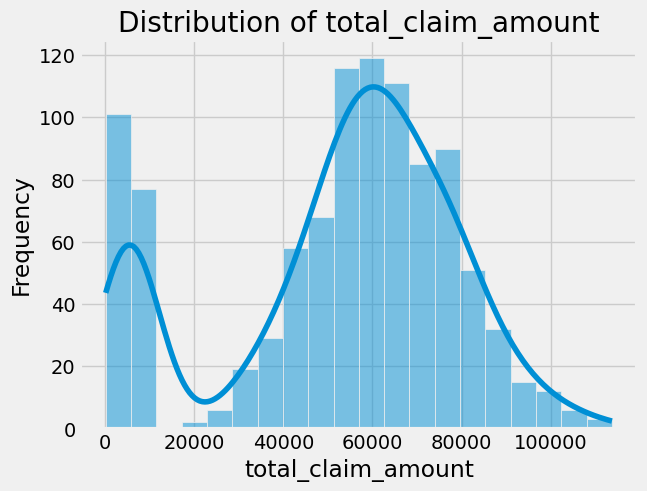

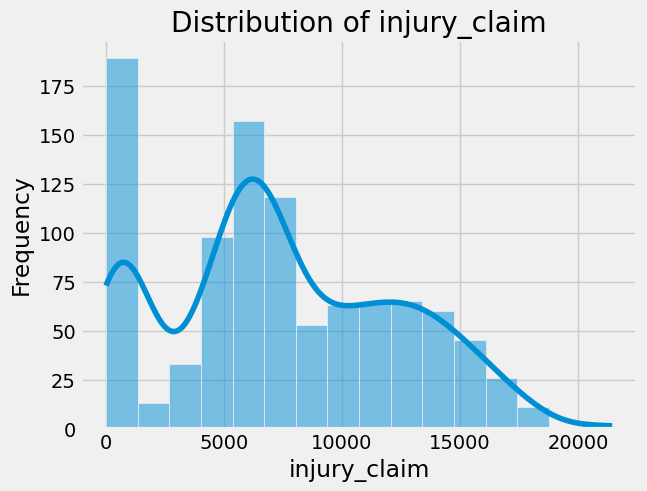

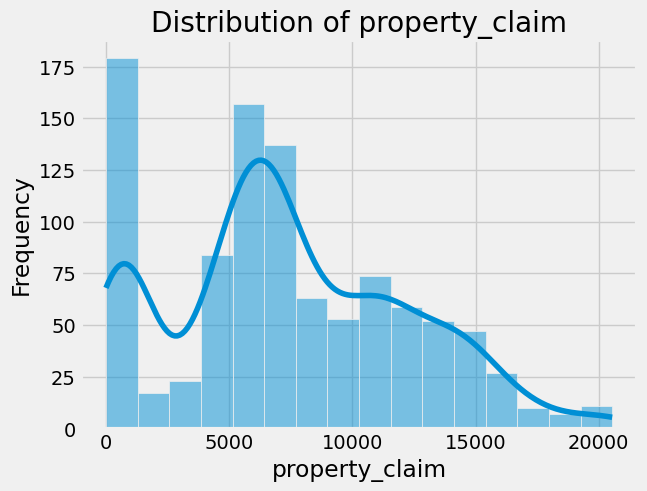

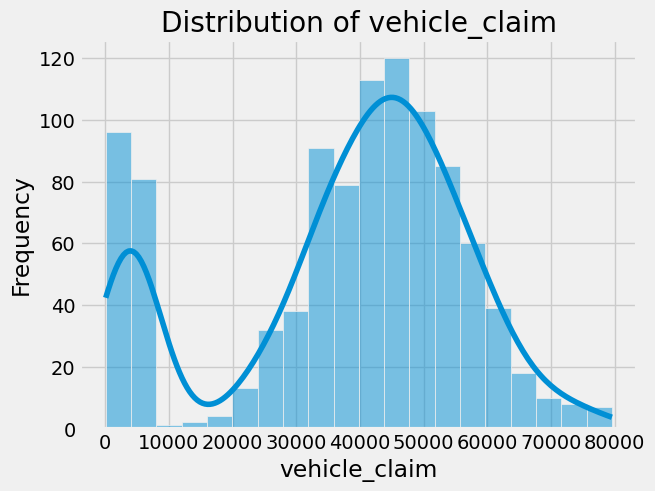

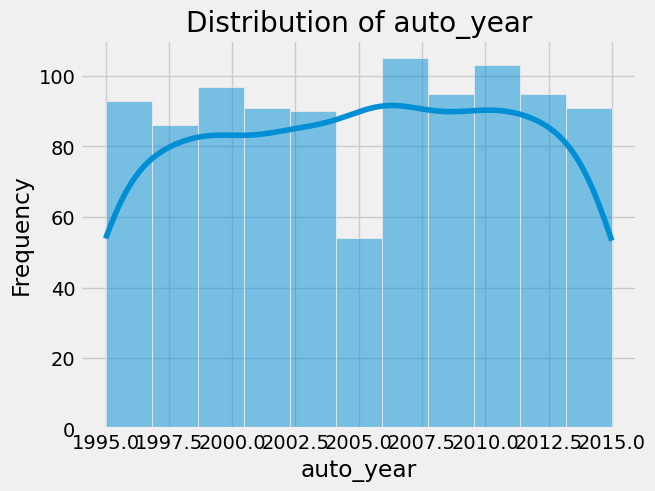

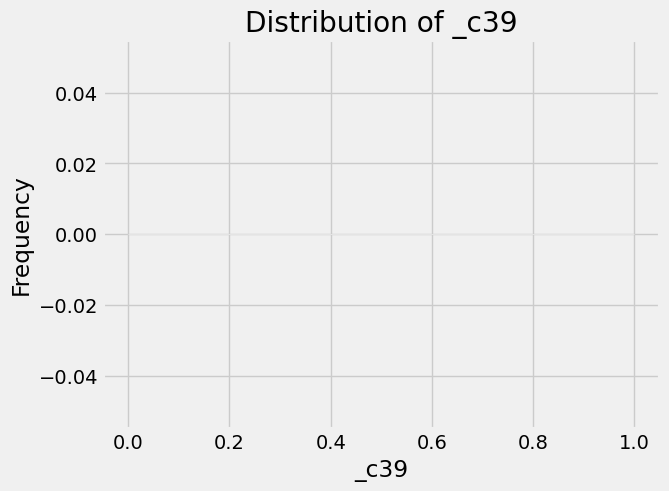

In [8]:
df_num_features = df.select_dtypes(include=['int64', 'float64'])
for column in df_num_features.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

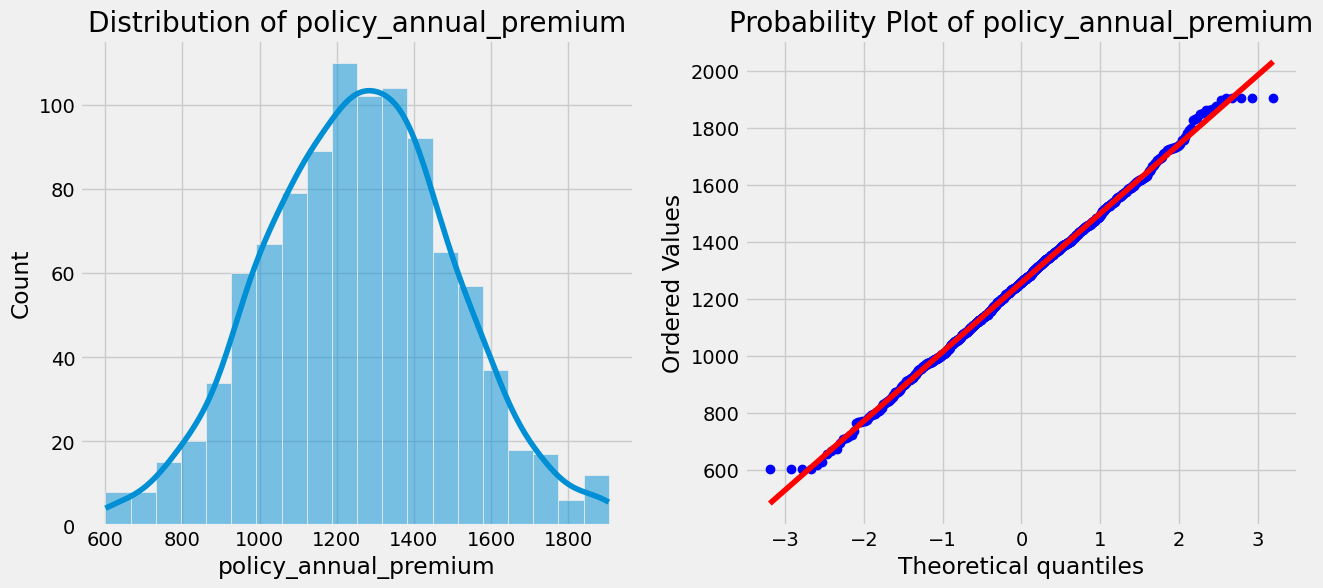

In [9]:
def visualize_distribution_and_probability_plot(data, feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Visualizing distribution
    sns.histplot(data=data, x=feature, kde=True, ax=axes[0])
    axes[0].set_title('Distribution of ' + feature)

    # Visualizing probability plot
    stats.probplot(data[feature], dist="norm", plot=axes[1])
    axes[1].set_title('Probability Plot of ' + feature)

    plt.show()

# Call the function for 'policy_annual_premium'
visualize_distribution_and_probability_plot(df, 'policy_annual_premium')


In [20]:
descriptive_stats = df.describe()
print(descriptive_stats)


       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.942000  546238.648000        1136.000000   
std            115.113174     9.124576  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    62.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000          1000.0    1000.000000    1000.000000   
mean             1256.506126             0.0  501214.488000   25126.100000   
std               242.246335             0.0   71701.610941   27872.187708   
min

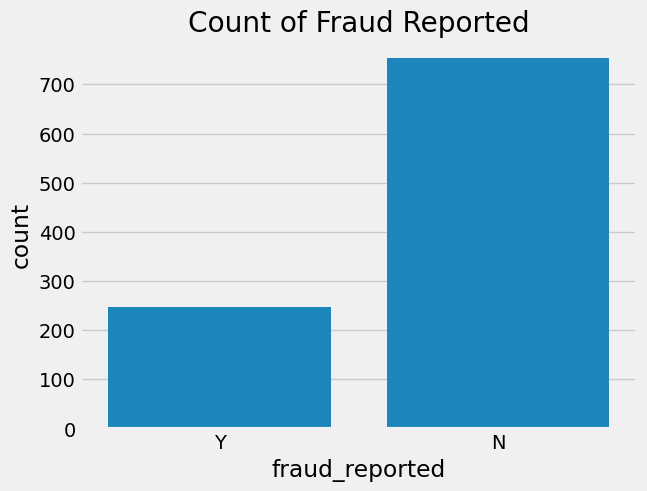

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for 'fraud_reported'
sns.countplot(data=df, x='fraud_reported')
plt.title('Count of Fraud Reported')
plt.show()


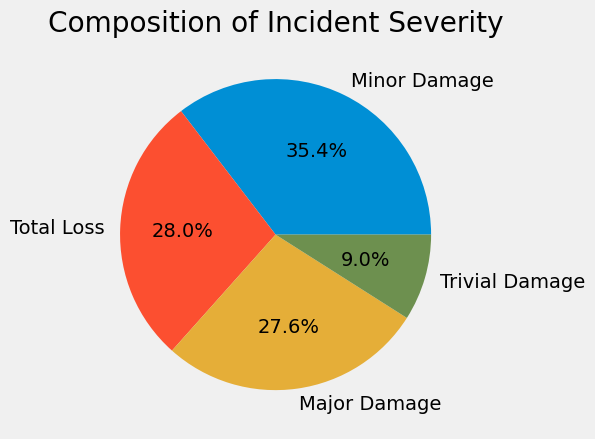

In [22]:
incident_severity_counts = df['incident_severity'].value_counts()
plt.pie(incident_severity_counts, labels=incident_severity_counts.index, autopct='%1.1f%%')
plt.title('Composition of Incident Severity')
plt.show()


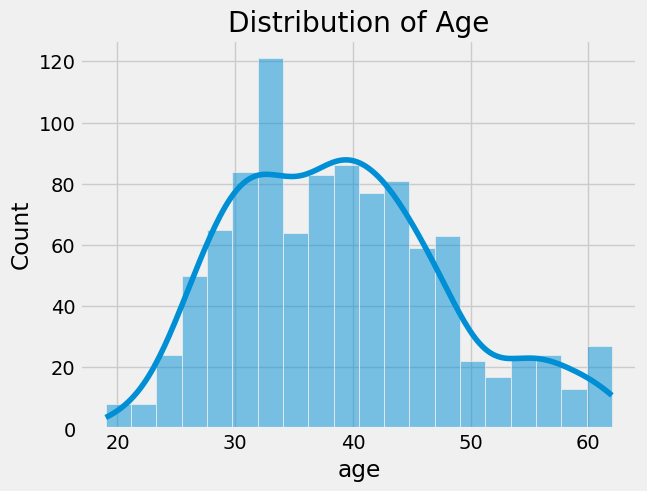

In [23]:
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()


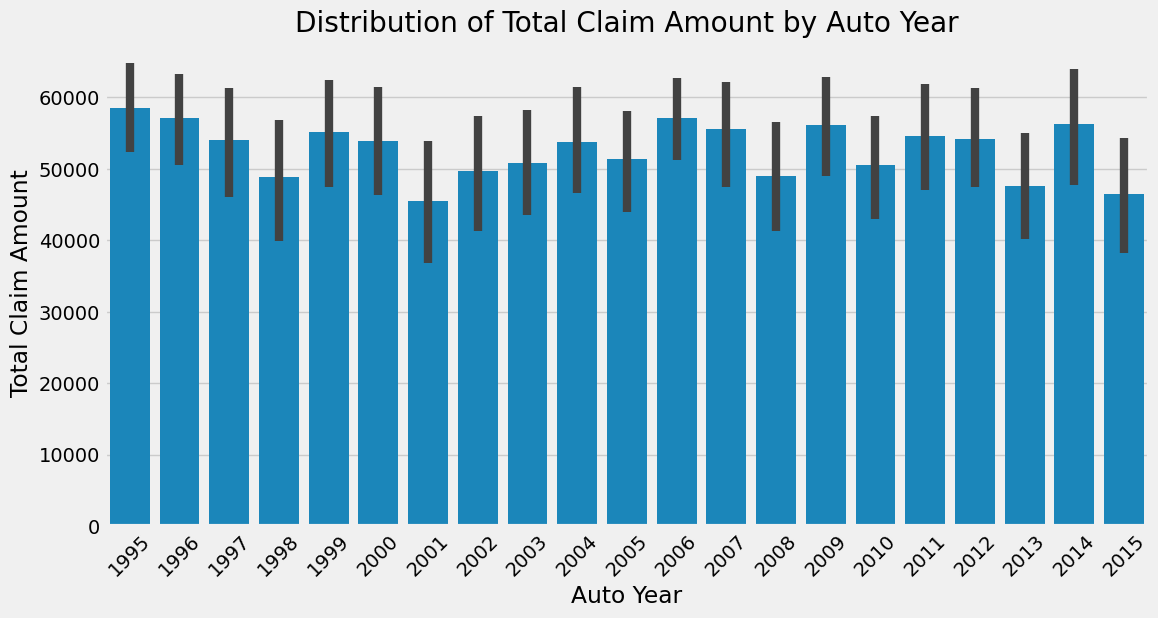

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='auto_year', y='total_claim_amount')
plt.title('Distribution of Total Claim Amount by Auto Year')
plt.xlabel('Auto Year')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)
plt.show()


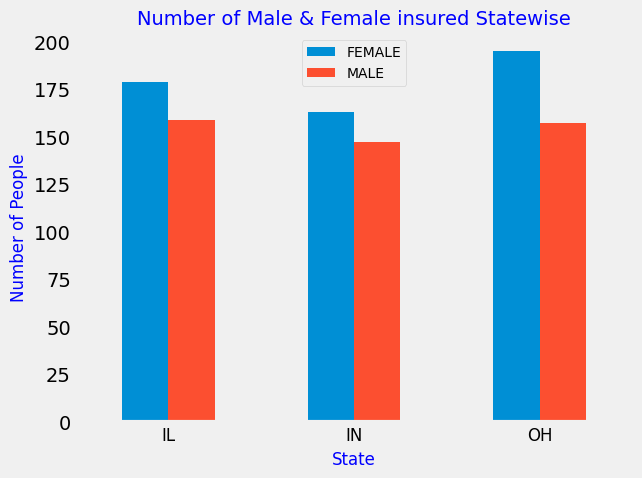

In [25]:
insurance_state = pd.crosstab(df.policy_state, df.insured_sex)
insurance_state.plot(kind='bar',grid=False)
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('State', fontsize=12,color='blue')
plt.ylabel('Number of People', fontsize=12,color='blue')
plt.legend(fontsize=10)
plt.title('Number of Male & Female insured Statewise', fontsize=14,color='blue');

In [26]:
file_path = r'C:\Users\rajes\OneDrive\Desktop\auto insurence fraud detection\data\insurance_claims.csv'
daata1 = pd.read_csv(file_path)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in daata1.columns:
    if daata1[column].dtype=='object':
        daata1[column] = le.fit_transform(daata1[column])

In [63]:
important_features_indices = [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
X_train_imputed = X_train.iloc[:, 30]
X_test_imputed = X_test.iloc[:, 30]


In [64]:
from sklearn.model_selection import train_test_split
X = daata1.drop(columns=['fraud_reported'])
y = daata1['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [65]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
imputer = SimpleImputer(strategy='mean') 
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
smt = SMOTE()
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_imputed, y_train)


In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_imputed)
X_train_scaled_df = pd.DataFrame(X_train_imputed, columns=X_train_imputed.columns)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = std_scaler.transform(X_test_imputed)
X_test_scaled_df = pd.DataFrame(X_test_imputed, columns=X_test_imputed.columns)


In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train_imputed, y_train)
y_pred = dtc.predict(X_test_imputed)
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train_imputed))
dtc_test_acc = accuracy_score(y_test, y_pred)


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(criterion='entropy', 
                             max_depth=10, 
                             max_features='sqrt', 
                             min_samples_leaf=1, 
                             min_samples_split=3, 
                             n_estimators=140)
rfc.fit(X_train_imputed, y_train)
y_pred = rfc.predict(X_test_imputed)
rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train_imputed))
rfc_test_acc = accuracy_score(y_test, y_pred)


In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train_imputed, y_train)
y_pred_knn = knn.predict(X_test_imputed)
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Confusion Matrix:
[[143   0]
 [ 57   0]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       143
           1       0.00      0.00      0.00        57

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200



In [93]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
lg = LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
lg.fit(X_train_imputed, y_train)
lg_pred = lg.predict(X_test_imputed)
print("Confusion Matrix:")
print(confusion_matrix(y_test, lg_pred))


Confusion Matrix:
[[143   0]
 [ 57   0]]


In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
model_2 = gnb.fit(X_train_imputed, y_train)
predict_log = model_2.predict(X_test_imputed)
train_accuracy = accuracy_score(model_2.predict(X_train_imputed), y_train)
print("Training Accuracy:", 100 * train_accuracy)
test_accuracy = accuracy_score(y_test, predict_log)
print("Testing Accuracy:", 100 * test_accuracy)


Training Accuracy: 76.375
Testing Accuracy: 69.5


In [95]:
print("Number of features in X_train_imputed:", X_train_imputed.shape[1])
print("Number of features in X_test_imputed:", X_test_imputed.shape[1])


Number of features in X_train_imputed: 28
Number of features in X_test_imputed: 28


In [96]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
important_features_indices = [0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
X_train_imputed = X_train.iloc[:, important_features_indices]
X_test_imputed = X_test.iloc[:, important_features_indices]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_svc = SVC(**best_params)
best_svc.fit(X_train_scaled, y_train)
y_pred = best_svc.predict(X_test_scaled)
svc_train_acc = accuracy_score(y_train, best_svc.predict(X_train_scaled))
svc_test_acc = accuracy_score(y_test, y_pred)
print(f"Training accuracy of SVC: {svc_train_acc}")
print(f"Test accuracy of SVC: {svc_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
input_features = [[328, 521585, 2012, 12, 250, 1000, 1406.91, 5600, 1, 100, 25, 25, 50000, 0, 120, 23, 56, 52, 1, 123, 2, 3, 1, 0, 2, 1, 150000, 2, 25, 2002]]
input_features_selected = np.array(input_features)[:, important_features_indices]
input_features_scaled = scaler.transform(input_features_selected)
example_prediction = best_svc.predict(input_features_scaled)
print("Example Prediction:", example_prediction)


Best Hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}
Training accuracy of SVC: 0.81125
Test accuracy of SVC: 0.81
[[123  20]
 [ 18  39]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       143
           1       0.66      0.68      0.67        57

    accuracy                           0.81       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.81      0.81      0.81       200

Example Prediction: [0]


In [97]:
def comparison(X_test_imputed,y_test):
    print("logistic Regression: ",100*accuracy_score(y_test, lg_pred))
    print("-"*100)
    print("KNN", 100*accuracy_score(y_test, y_pred_knn))
    print("-"*100)
    print("SVM", 100*svc_train_acc)
    print("-"*100)
    print("Naive-Bayes", 100* accuracy_score(model_2.predict(X_test_imputed), y_test))
    print("-"*100)
    print("Decision Tree", 100*dtc_test_acc)
    print("-"*100)
    print("Random Forest", 100*rfc_test_acc)
    print("-"*100)  
comparison(X_test_imputed,y_test)    

logistic Regression:  71.5
----------------------------------------------------------------------------------------------------
KNN 71.5
----------------------------------------------------------------------------------------------------
SVM 81.125
----------------------------------------------------------------------------------------------------
Naive-Bayes 69.5
----------------------------------------------------------------------------------------------------
Decision Tree 80.5
----------------------------------------------------------------------------------------------------
Random Forest 75.5
----------------------------------------------------------------------------------------------------


In [98]:
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lg_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lg_pred))

Logistic Regression Confusion Matrix:
[[143   0]
 [ 57   0]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       143
           1       0.00      0.00      0.00        57

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200



In [99]:
# SVM
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))


SVM Confusion Matrix:
[[123  20]
 [ 18  39]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       143
           1       0.66      0.68      0.67        57

    accuracy                           0.81       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.81      0.81      0.81       200



In [100]:
# Decision Tree
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Confusion Matrix:
[[123  20]
 [ 18  39]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       143
           1       0.66      0.68      0.67        57

    accuracy                           0.81       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.81      0.81      0.81       200



In [101]:
models_dir = r"C:\Users\rajes\OneDrive\Desktop\auto insurence fraud detection\py\models"


In [102]:
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [103]:
dtc_model_path = os.path.join(models_dir, "dtc_model.pkl")
with open(dtc_model_path, "wb") as model_file:
    pickle.dump(dtc, model_file)

In [104]:
import os
import pickle

# Define the directory containing the saved models
models_dir = "models"
scaler_filename = "std_scaler.pkl"
scaler_path = os.path.join(models_dir, scaler_filename)

# Check if the scaler file exists
if os.path.exists(scaler_path) and os.path.getsize(scaler_path) > 0:
    # Load the scaler object
    with open(scaler_path, "rb") as scaler_file:
        try:
            scaler = pickle.load(scaler_file)
            print("Scaler object loaded successfully.")
        except (EOFError, pickle.UnpicklingError) as e:
            print(f"Error loading scaler object: {e}")
else:
    print(f"Scaler file '{scaler_filename}' does not exist or is empty.")


Scaler object loaded successfully.


In [105]:
scaler_path = os.path.join(models_dir, "std_scaler.pkl")
with open(scaler_path, "wb") as scaler_file:
    pickle.dump(std_scaler, scaler_file)